In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [42]:
df = pd.read_csv("BIO-TECH_STOCK_DATA.CSV")
df

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,0,2019-02-11,8050.000000,8050.000000,7600.000000,7666.399902,7446.035156,21425.0,ABBOTINDIA.NS
1,1,2019-02-12,7700.100098,7787.000000,7640.000000,7754.549805,7531.651367,5889.0,ABBOTINDIA.NS
2,2,2019-02-14,7684.250000,7693.850098,7465.350098,7644.750000,7425.007812,5685.0,ABBOTINDIA.NS
3,3,2019-02-15,7721.200195,7721.200195,7400.000000,7442.450195,7228.522461,5351.0,ABBOTINDIA.NS
4,4,2019-02-18,7500.000000,7500.000000,7211.000000,7264.200195,7055.396973,2938.0,ABBOTINDIA.NS
...,...,...,...,...,...,...,...,...,...
119974,752,2022-02-02,8.480000,8.570000,7.650000,7.860000,7.860000,1505200.0,ZYME
119975,753,2022-02-03,7.790000,7.990000,7.400000,7.490000,7.490000,1452400.0,ZYME
119976,754,2022-02-04,7.470000,8.050000,7.410000,7.950000,7.950000,1132100.0,ZYME
119977,755,2022-02-07,7.900000,8.330000,7.830000,7.960000,7.960000,531800.0,ZYME


In [43]:
rows_with_nan = [index for index, row in df.iterrows() if row.isnull().any()]

print(rows_with_nan)

[108528]


In [44]:
print(df.loc[[108528]])


        Unnamed: 0        Date  Open  High  Low  Close  Adj Close  Volume  \
108528         739  2022-02-09   NaN   NaN  NaN    NaN        NaN     NaN   

              ticker  
108528  SUNPHARMA.NS  


In [45]:
df.drop([108528],axis=0,inplace=True)

In [46]:
df.drop(["Unnamed: 0","Adj Close","ticker"],axis=1,inplace=True)

In [47]:
df

,Date,Open,High,Low,Close,Volume
0,2019-02-11,8050.000000,8050.000000,7600.000000,7666.399902,21425.0
1,2019-02-12,7700.100098,7787.000000,7640.000000,7754.549805,5889.0
2,2019-02-14,7684.250000,7693.850098,7465.350098,7644.750000,5685.0
3,2019-02-15,7721.200195,7721.200195,7400.000000,7442.450195,5351.0
4,2019-02-18,7500.000000,7500.000000,7211.000000,7264.200195,2938.0
...,...,...,...,...,...,...
119974,2022-02-02,8.480000,8.570000,7.650000,7.860000,1505200.0
119975,2022-02-03,7.790000,7.990000,7.400000,7.490000,1452400.0
119976,2022-02-04,7.470000,8.050000,7.410000,7.950000,1132100.0
119977,2022-02-07,7.900000,8.330000,7.830000,7.960000,531800.0


In [48]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119978 entries, 0 to 119978
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    119978 non-null  object 
 1   Open    119978 non-null  float64
 2   High    119978 non-null  float64
 3   Low     119978 non-null  float64
 4   Close   119978 non-null  float64
 5   Volume  119978 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.4+ MB


In [50]:
Y = df[["Close"]]

In [51]:
Y

,Close
0,7666.399902
1,7754.549805
2,7644.750000
3,7442.450195
4,7264.200195
...,...
119974,7.860000
119975,7.490000
119976,7.950000
119977,7.960000


In [52]:
#X = df.drop(["Close","Date"],axis=1)
X = df[["Open","High","Low","Volume"]]

In [53]:
X

,Open,High,Low,Volume
0,8050.000000,8050.000000,7600.000000,21425.0
1,7700.100098,7787.000000,7640.000000,5889.0
2,7684.250000,7693.850098,7465.350098,5685.0
3,7721.200195,7721.200195,7400.000000,5351.0
4,7500.000000,7500.000000,7211.000000,2938.0
...,...,...,...,...
119974,8.480000,8.570000,7.650000,1505200.0
119975,7.790000,7.990000,7.400000,1452400.0
119976,7.470000,8.050000,7.410000,1132100.0
119977,7.900000,8.330000,7.830000,531800.0


In [54]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X,Y)


DecisionTreeRegressor()

In [56]:
test_pred = tree.predict(X)

print('Test set evaluation:\n_____________________________________')
print_evaluate(Y, test_pred)


Test set evaluation:
_____________________________________
MAE: 8.883412822685412e-20
MSE: 3.156022224958623e-34
RMSE: 1.7765196945034476e-17
R2 Square 1.0
__________________________________


In [57]:
df1 = pd.DataFrame(test_pred)
df2 = pd.DataFrame(Y)


In [58]:
result = pd.concat([df1, df2], axis=1, join='inner')
display(result)

,0,Close
0,7666.399902,7666.399902
1,7754.549805,7754.549805
2,7644.750000,7644.750000
3,7442.450195,7442.450195
4,7264.200195,7264.200195
...,...,...
119973,7.860000,8.410000
119974,7.490000,7.860000
119975,7.950000,7.490000
119976,7.960000,7.950000


In [59]:
import   pickle
saved_model = pickle.dumps(tree)

In [60]:
df = df[["Close"]]
df.head(5)

,Close
0,7666.399902
1,7754.549805
2,7644.750000
3,7442.450195
4,7264.200195


In [61]:
future_days = 200
df["Prediction"] = df[["Close"]].shift(-future_days)
df.tail(5)

<ipython-input-61-f05a2e83b067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Prediction"] = df[["Close"]].shift(-future_days)


,Close,Prediction
119974,7.86,NaN
119975,7.49,NaN
119976,7.95,NaN
119977,7.96,NaN
119978,7.64,NaN


In [62]:
x=np.array(df.drop(["Prediction"],1))[:-future_days]
print(x)

[[7666.39990234]
 [7754.54980469]
 [7644.75      ]
 ...
 [  27.76000023]
 [  28.35000038]
 [  28.39999962]]


In [63]:
y=np.array(df["Prediction"])[:-future_days]
print(y)

[1.25544004e+04 1.28048496e+04 1.29821504e+04 ... 7.94999981e+00
 7.96000004e+00 7.63999987e+00]


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [65]:
x_future = df.drop(["Prediction"],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[33.18999863],
       [31.31999969],
       [30.79999924],
       [30.70999908],
       [31.14999962],
       [33.02999878],
       [32.11000061],
       [30.64999962],
       [31.70000076],
       [30.53000069],
       [30.21999931],
       [30.64999962],
       [29.80999947],
       [29.20999908],
       [30.21999931],
       [30.53000069],
       [32.45999908],
       [31.37000084],
       [31.27000046],
       [31.43000031],
       [30.90999985],
       [30.86000061],
       [30.21999931],
       [30.29000092],
       [29.97999954],
       [29.5       ],
       [30.06999969],
       [29.76000023],
       [29.79999924],
       [30.52000046],
       [30.11000061],
       [31.09000015],
       [33.59000015],
       [31.27000046],
       [30.94000053],
       [31.75      ],
       [32.41999817],
       [32.40000153],
       [32.02999878],
       [32.        ],
       [31.70000076],
       [31.29000092],
       [31.43000031],
       [32.52000046],
       [38.27000046],
       [41

In [66]:
tree1 = DecisionTreeRegressor()
tree1.fit(x,y)


DecisionTreeRegressor()

In [67]:
tree1_prediction = tree1.predict(x_future)
print(tree1_prediction)

[190.78599984  22.93227282  52.44153749 190.70849786  32.81693721
  81.07090898  18.9772726   29.90714264  24.32687491  32.89409083
  65.67692221  29.90714264  75.31625071  66.58357223  65.67692221
  32.89409083 170.47199926 254.46386248  38.138333    34.20666655
  25.77428566 396.38556586  65.67692221 248.54824044  54.88111051
  52.60384569  25.36105012  81.08052594  89.08794123 185.91400251
 119.69125152 180.05473995 227.63000304  38.138333    49.43470594
  45.87795396  41.02687499  29.05117613  21.38214285 133.8813353
  24.32687491  28.97785718  34.20666655  39.5296157   29.54371452
  32.73571396  44.70761927  89.69499942  32.60269238  44.11960254
  34.66888926 143.52899704  26.30000091 513.53333378  42.01714264
  44.23250008  22.51333332  28.41714273  44.18600006  63.40444522
 196.3300004   34.29444419  48.86857142  40.99444358  43.41124988
  34.27666688  34.34000026  30.14999962  33.81000023  31.21999991
  77.17500019  38.99299979 139.95285525  30.10142803  28.18692339
  38.390000

<ipython-input-68-6c4bfd9e52d3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Prediction"] = prediction


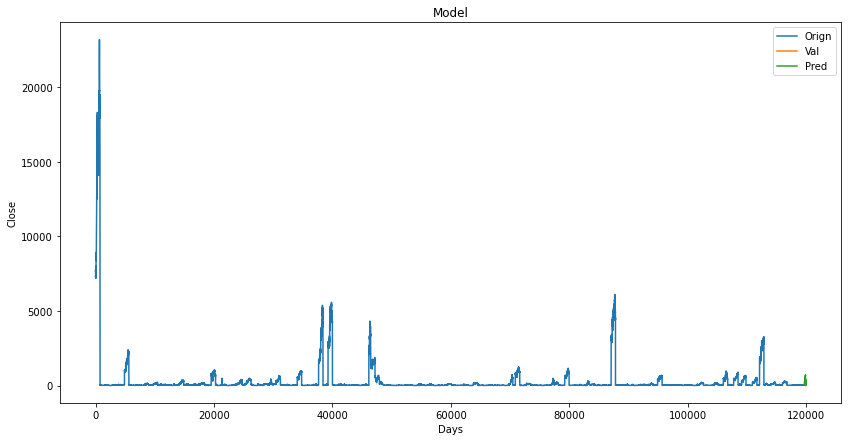

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\HP\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote

In [68]:
prediction = tree1_prediction

valid = df[x.shape[0]:]
valid["Prediction"] = prediction
plt.figure(figsize=(14,7))
plt.title("Model")
plt.xlabel("Days")
plt.ylabel("Close")
plt.plot(df["Close"])
plt.plot(valid[["Close","Prediction"]])
plt.legend(["Orign","Val","Pred"])
plt.show()
